In [11]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
%matplotlib inline
np.set_printoptions(threshold=np.nan)
np.random.seed(117)

/home/elessar/anaconda3/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
label = np.unique(y_test)
img_sz = X_train[0].shape
X_train = X_train.reshape((X_train.shape[0], img_sz[0] * img_sz[1]))
X_test = X_test.reshape((X_test.shape[0], img_sz[0] * img_sz[1]))
X_train = X_train/255.
X_test = X_test/255.
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

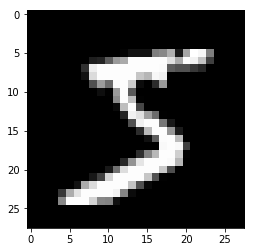

In [13]:
plt.gray()
plt.imshow(X_train[0].reshape((img_sz[0], img_sz[1])))
plt.show()

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression

def classify(X_train, X_test, y_train, y_test, classifier):
    if classifier == "lda":
        clf = LDA()
    elif classifier == "qda":
        clf = QDA()
    elif classifier == "logreg":
        clf = LogisticRegression(multi_class='multinomial', solver='newton-cg')
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print(pred[:10])
    cfmtx = confusion_matrix(y_test, pred)
    df = pd.DataFrame(cfmtx, columns=label, index=label)
    df.columns.name = 'pred\\true'
    print(df)
    prfs = precision_recall_fscore_support(y_test, pred, average='macro')
    print('precision:', prfs[0], '\nrecall:', prfs[1], '\nfscore:', prfs[2])

In [15]:
# LDA
classify(X_train, X_test, y_train, y_test, 'lda')

/home/elessar/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/elessar/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


[7 2 1 0 4 1 4 9 5 9]
pred\true    0     1    2    3    4    5    6    7    8    9
0          940     0    1    4    2   13    9    1    9    1
1            0  1096    4    3    2    2    3    0   25    0
2           15    32  816   34   21    5   37    9   57    6
3            5     5   25  883    4   25    3   16   29   15
4            0    12    6    0  888    4    7    2   10   53
5            8     8    4   44   12  735   15   10   38   18
6           12     8   11    0   25   29  857    0   16    0
7            2    30   15    9   22    2    0  864    4   80
8            7    27    8   27   20   53   10    6  790   26
9            9     7    1   13   63    6    0   37   12  861
precision: 0.873539341852337 
recall: 0.8717492923023655 
fscore: 0.8716902765509023


In [18]:
# QDA
classify(X_train, X_test, y_train, y_test, 'qda')

/home/elessar/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


[9 2 1 0 8 1 8 9 0 9]
pred\true    0     1    2    3   4   5    6    7    8    9
0          947     1    0    7   0   1    8    1   14    1
1            9  1080    3    2   0   0   17    0   23    1
2          435    11  174  103   4   0  172    5  116   12
3          413    15    1  287   0   1   48    3  178   64
4          228     8    7   10  88   1   65   11  166  398
5          272     5    2   19   0  61  101    2  374   56
6           25     3    2    1   0   3  919    0    4    1
7           11     8    3   15   0   0    2  302   30  657
8          115    55    3   11   0   6   34    3  651   96
9           19     8    2    6   1   0    0    8    7  958
precision: 0.6992647595750137 
recall: 0.5399527368897903 
fscore: 0.4775517262812077


In [19]:
# logistic regression
classify(X_train, X_test, y_train, y_test, 'logreg')

[7 2 1 0 4 1 4 9 6 9]
pred\true    0     1    2    3    4    5    6    7    8    9
0          955     0    2    4    1   10    4    3    1    0
1            0  1110    5    2    0    2    3    2   11    0
2            6     9  930   14   10    3   12   10   34    4
3            4     1   16  925    1   23    2   10   19    9
4            1     3    7    3  921    0    6    5    6   30
5            9     2    3   35   10  777   15    6   31    4
6            8     3    8    2    6   16  912    2    1    0
7            1     7   23    7    6    1    0  947    4   32
8            9    11    6   22    7   29   13   10  855   12
9            9     8    1    9   21    7    0   21    9  924
precision: 0.9246418911040273 
recall: 0.9245196955223417 
fscore: 0.9245145146579435


In [20]:
# the variance to determine the components in pca 
var_ladder =[]
for i in range(15):
    var_ladder.append(0.2+i*0.05)
var_ladder_output = ['%.2f' % elem for elem in var_ladder]
print(var_ladder_output)

['0.20', '0.25', '0.30', '0.35', '0.40', '0.45', '0.50', '0.55', '0.60', '0.65', '0.70', '0.75', '0.80', '0.85', '0.90']


In [21]:
from sklearn.decomposition import PCA
def pca_data(X_train,X_test,var_explained):
    pca=PCA(svd_solver='randomized',whiten=True)
    pca.fit(X_train)
    var=np.cumsum(pca.explained_variance_ratio_)
    pca=PCA(np.argwhere(var>var_explained)[0][0],svd_solver='randomized',whiten=True)
    pca.fit(X_train)
    X_pca_train=pca.transform(X_train)
    X_pca_test=pca.transform(X_test)
    return X_pca_train, X_pca_test

X_train_list = []
X_test_list = []
for var in var_ladder:
    X_train_current, X_test_current = pca_data(X_train,X_test,var)
    X_train_list.append(X_train_current)
    X_test_list.append(X_test_current)

In [22]:
# store the intermediate result since the cell above is toooooooooooo slow!
import pickle
with open("pca_training.pkl","wb") as handle:
    pickle.dump(X_train_list,handle)
with open("pca_testing.pkl","wb") as handle:
    pickle.dump(X_test_list,handle)

In [23]:
# helper function for calculating accuracy
from sklearn.metrics import accuracy_score
def score(X_train, X_test, y_train, y_test, classifier):
    if classifier == "lda":
        clf = LDA()
    elif classifier == "qda":
        clf = QDA()
    elif classifier == "logreg":
        clf = LogisticRegression(multi_class='multinomial', solver='newton-cg')
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    return accuracy_score(y_test,pred)

In [24]:
def printlist(list):
    for i in list:
        print(i,end=" ")
    print()

In [25]:
# LDA: accuracy ~ total-variance-explained
lda_accuracies = []
for i in range(15):
    acc = score(X_train_list[i],X_test_list[i],y_train,y_test,'lda')
    lda_accuracies.append(acc)
printlist(lda_accuracies)

/home/elessar/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


0.4429 0.466 0.5629 0.6649 0.7098 0.7606 0.7749 0.7988 0.819 0.8455 0.8543 0.864 0.8715 0.8756 0.875 


In [26]:
# QDA: accuracy ~ total-variance-explained
qda_accuracies = []
for i in range(15):
    acc = score(X_train_list[i],X_test_list[i],y_train,y_test,'qda')
    qda_accuracies.append(acc)
printlist(qda_accuracies)

0.4607 0.5026 0.631 0.732 0.8005 0.8654 0.892 0.9241 0.9374 0.9501 0.957 0.9633 0.9622 0.9614 0.9591 


In [27]:
# Logistic Regression: accuracy ~ total-variance-explained
logreg_accuracies=[]
for i in range(15):
    acc = score(X_train_list[i],X_test_list[i],y_train,y_test,'logreg')
    logreg_accuracies.append(acc)
printlist(logreg_accuracies)

0.446 0.476 0.5777 0.6873 0.7375 0.7902 0.8094 0.8394 0.8567 0.8806 0.8916 0.902 0.9105 0.9174 0.9207 


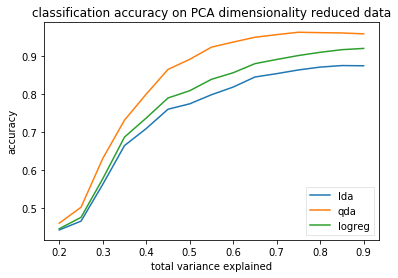

In [28]:
ax=plt.subplot(111)
plt.plot(var_ladder,lda_accuracies,label="lda")
plt.plot(var_ladder,qda_accuracies,label="qda")
plt.plot(var_ladder,logreg_accuracies,label="logreg")
leg = plt.legend(loc=4, ncol=1, shadow=False, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.title("classification accuracy on PCA dimensionality reduced data")
plt.xlabel('total variance explained')
plt.ylabel('accuracy')
plt.show()

In [29]:
pca=PCA(svd_solver='randomized',whiten=True)
pca.fit(X_train)
var=np.cumsum(pca.explained_variance_ratio_)
print("best number of dimension: " + str(np.argwhere(var>0.75)[0][0]))

best number of dimension: 33


In [30]:
# Dimension reduction using PCA, code ref: https://www.kaggle.com/ddmngml/pca-and-svm-on-mnist-dataset

n_components = 33
pca = PCA(n_components=n_components, svd_solver='randomized',whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

0.7496131790605177

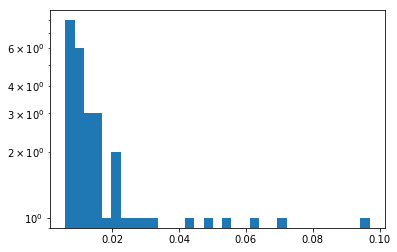

In [31]:
plt.hist(pca.explained_variance_ratio_, bins=n_components, log=True)
pca.explained_variance_ratio_.sum()

In [32]:
# PCA-LDA
classify(X_train_pca, X_test_pca, y_train, y_test, 'lda')

/home/elessar/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


[7 2 1 0 4 1 4 9 4 9]
pred\true    0     1    2    3    4    5    6    7    8    9
0          913     0    2    5    0   36   20    2    2    0
1            0  1095    4    1    1    1    3    1   29    0
2           12    45  814   29   19    6   20   25   51   11
3            4     9   31  852    1   50    4   25   20   14
4            1    12    2    0  845    3   10    1    9   99
5            9    11    8   47   14  731   19   10   32   11
6           13    10    3    1   18   40  867    1    4    1
7            3    45   21    3   16    2    1  876    6   55
8            6    35    7   35   13   53   12    9  780   24
9            8    13    5    8   64   22    2   21    8  858
precision: 0.8639747126873495 
recall: 0.8617028683066159 
fscore: 0.861855380372357


In [33]:
# PCA-QDA
classify(X_train_pca, X_test_pca, y_train, y_test, 'qda')

[7 2 1 0 4 1 4 9 5 9]
pred\true    0     1     2    3    4    5    6    7    8    9
0          966     0     1    0    0    7    2    1    3    0
1            0  1103     9    4    1    2    1    0   15    0
2            3     0  1009    2    2    0    3    2   11    0
3            1     0     8  972    0    8    0    5   12    4
4            2     0     3    0  964    0    3    1    2    7
5            3     0     0   19    0  862    1    0    6    1
6            6     1     0    0    2   13  929    0    7    0
7            0     5    29    5    2    5    0  955    7   20
8            5     0    10   13    1    5    2    3  928    7
9            5     3     8    6   13    3    0    7   19  945
precision: 0.9633633467430158 
recall: 0.9633707507400455 
fscore: 0.9631790308218374


In [34]:
# PCA-logistic regression
classify(X_train_pca, X_test_pca, y_train, y_test, 'logreg')

[7 2 1 0 4 1 4 9 6 9]
pred\true    0     1    2    3    4    5    6    7    8    9
0          948     0    5    3    0   14    9    1    0    0
1            0  1107    4    2    0    2    3    1   16    0
2           11     9  895   17   14    5   17   17   41    6
3            3     0   24  908    1   30    2   14   20    8
4            2     2    5    1  894    2   12    4   10   50
5           11     3    9   51   14  739   18    8   30    9
6           18     3    6    1   14   17  892    4    3    0
7            4    10   31    6   12    2    0  933    2   28
8           12     7    9   34   11   41   13   11  820   16
9            9     9    5    9   41   15    1   26   15  879
precision: 0.8997890406594944 
recall: 0.8999540301378752 
fscore: 0.8997505861578314


<style>
.text_cell_render h{
font-family: Times New Roman, serif;
font-size: 18;
}
</style>
# Discriminant Analysis: the assumption of gaussian distribution

In [35]:
from scipy.stats import normaltest as norm_test
from collections import Counter

# a voing procedure to eliminate non-gaussian elements
def retain_gaussian(X_train,X_test,y_train,voters=5):
    norm_pvalue_mtx=np.zeros((10,X_train[0].shape[0]))
    for i in range(10):
        _, norm_pvalue_mtx[i] = norm_test(X_train[y_train==i],axis=0)
    alpha=1e-3
    non_norm_predictors=np.argwhere(norm_pvalue_mtx>alpha)[:,1]
    non_norm_predictors=np.array([x for x,y in Counter(non_norm_predictors).items() if y > voters])
    print("voting for non-gaussian predictors")
    print("%i predictors voted out"%non_norm_predictors.shape[0])
    mask=np.ones(X_train[0].shape[0],dtype=bool)
    mask[non_norm_predictors]=False
    return X_train[:,mask], X_test[:,mask]

In [36]:
X_train_gau, X_test_gau = retain_gaussian(X_train_pca,X_test_pca,y_train)

voting for non-gaussian predictors
1 predictors voted out


**only one predictor voted out illustrates that nearly all predictors follow the
gaussian distribution**

<style>
.text_cell_render h{
font-family: Times New Roman, serif;
font: 18;
}
</style>
# QDA vs LDA: the assumption of equal covariance

In [37]:
# the covariance matrix of each class from QDA
sigma_model=QDA(store_covariance=True)
sigma_model.fit(X_train_pca,y_train)
fitted_cov = sigma_model.covariance_

In [38]:
# the covariance matrix calculated from raw input
real_cov=[]
for i in range(10):
    current=X_train_pca[y_train==i]
    real_cov.append(np.cov(current,rowvar=False))

In [39]:
fitted_cov = np.array(fitted_cov)
real_cov = np.array(real_cov)
fitted_cov=np.reshape(fitted_cov,(fitted_cov.shape[0],fitted_cov.shape[1]*fitted_cov.shape[2]))
real_cov=np.reshape(real_cov,(real_cov.shape[0],real_cov.shape[1]*real_cov.shape[2]))

In [40]:
# the display below is better is precision is 2
np.set_printoptions(precision=2, suppress=True)

In [41]:
# The cosine similarity meansures the direction difference between matrixes
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(fitted_cov,real_cov))

[[1.   0.11 0.44 0.45 0.32 0.45 0.49 0.27 0.42 0.31]
 [0.11 1.   0.2  0.18 0.29 0.15 0.2  0.22 0.3  0.2 ]
 [0.44 0.2  1.   0.59 0.48 0.4  0.41 0.42 0.54 0.41]
 [0.45 0.18 0.59 1.   0.42 0.61 0.4  0.36 0.57 0.4 ]
 [0.32 0.29 0.48 0.42 1.   0.38 0.4  0.57 0.52 0.71]
 [0.45 0.15 0.4  0.61 0.38 1.   0.43 0.32 0.55 0.41]
 [0.49 0.2  0.41 0.4  0.4  0.43 1.   0.23 0.44 0.3 ]
 [0.27 0.22 0.42 0.36 0.57 0.32 0.23 1.   0.38 0.63]
 [0.42 0.3  0.54 0.57 0.52 0.55 0.44 0.38 1.   0.47]
 [0.31 0.2  0.41 0.4  0.71 0.41 0.3  0.63 0.47 1.  ]]


In [42]:
# euclidean differences measures absolute difference between matrixes
from sklearn.metrics.pairwise import pairwise_distances
np.set_printoptions(precision=1,suppress=True)
print(pairwise_distances(fitted_cov,real_cov))

[[ 0.  10.8  9.3  8.8  9.6  9.3  8.9  9.9  9.   9.5]
 [10.8  0.   9.8  9.3  8.3 10.1  9.8  8.8  8.5  8.7]
 [ 9.3  9.8  0.   7.2  8.   9.3  9.1  8.4  7.6  8.3]
 [ 8.8  9.3  7.2  0.   7.9  7.1  8.7  8.3  6.9  7.8]
 [ 9.6  8.3  8.   7.9  0.   8.8  8.5  6.6  7.1  5.2]
 [ 9.3 10.1  9.3  7.1  8.8  0.   9.   9.2  7.6  8.4]
 [ 8.9  9.8  9.1  8.7  8.5  9.   0.   9.6  8.4  9. ]
 [ 9.9  8.8  8.4  8.3  6.6  9.2  9.6  0.   8.1  5.9]
 [ 9.   8.5  7.6  6.9  7.1  7.6  8.4  8.1  0.   7.3]
 [ 9.5  8.7  8.3  7.8  5.2  8.4  9.   5.9  7.3  0. ]]


**the above proves two following thing:**
    
1. the real_covariance matrix is exactly the same with the fitted_covariance matrix
   (the diagonal value is 1)
2. the covariance matrix between each class differs a lot.

**Thus, QDA is better than LDA theoretically**